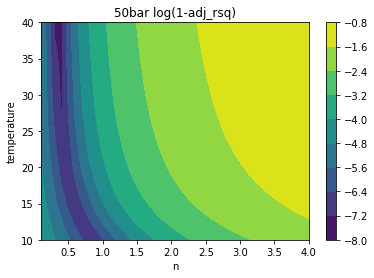

In [42]:
#importing all the necessary packages
from astropy.io import fits
import numpy as np
import astropy.io.fits as pyfits
import matplotlib.pyplot as plt
from scipy import stats
import warnings
import numpy.ma as ma
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import itertools
from matplotlib.mlab import griddata
from numpy import nan
#load the text file, extract the Temperature and Resistivity values from the columns and save it into individual arrays
datafile =  np.loadtxt("50bar.txt")[1:]
source = np.loadtxt("50bar.txt")
T = np.loadtxt("50bar.txt")[:,0]
rho=np.loadtxt("50bar.txt")[:,1]
#define the max temperature values for the different ranges and the range of power to raise the temperature value to, N.
tmax=np.arange(10,41,1)
N=np.arange(0.1,4.1,0.1)
#defined a function to find similar t values as the limits we want to create
def find_nearest(array,value):
    array=np.asarray(array)
    idx=(np.abs(array-value)).argmin()
    return array[idx]
j=[]
index=[]
#This makes a list of arrays with the same starting point that end at consecutive tmax values
rho=rho[~np.isnan(rho)]
T=T[~np.isnan(T)]
for i in tmax:
    j=find_nearest(T,i)
    T1=T.tolist()
    index.append(T1.index(j))
Temp_list=[]
Temp_array=[]
Rho_list=[]
Rho_array=[]
raisedT=[]
Rho=[]
Temp=[]
r=[]
counter=0
rn=[]
rt=[]
#this part of the code raises the temperature arrays to respective n values and find the corresponding r values using a linear regression package
for x in index:
    Temp_list=T[0:x]
    Temp_array=np.asarray(Temp_list)
    Rho_list=rho[0:x]
    Rho_array=np.asarray(Rho_list)
    #raisedT=[]
    #print(Temp_array)
    for y in N:
        raisedT=[]
        for g in Temp_array:
            raisedT.append(g**y)
        #print(len(raisedT))
        #print(len(Rho_array))
        slope, intercept, r_value, p_value, std_err = stats.linregress(raisedT, Rho_array)#10^1
        counter=counter+1
        r.append(r_value)
        rn.append(y)
        rt.append(g)
ra=np.asarray(r)
rsq=[]
#convert the r values to adjusted r squared values
for i in ra:
    rs = i**2
    r_s = 1 - (((1-rs)*(len(rho)-1))/(len(rho)-2-1))
    rsq.append(r_s)
rsq=np.asarray(rsq)
logrsq=[]
#perform log(1-rsq)
for j in rsq:
    a = (1 - j)
    b = np.log(a)
    logrsq.append(b)
logrsq=np.asarray(logrsq)
#arrange the final log values into a 2D array where the columns are the different n values and the rows are the adjusted r squared values. So you'll have the number of columns as the same number of n values.
log_rsq=np.reshape(logrsq,(-1,len(N)))
np.savetxt("50barvalues.txt",log_rsq)
#making the contour plot
plt.contourf(N,tmax,log_rsq)
plt.xlabel("n")
plt.ylabel("temperature")
plt.title("50bar log(1-adj_rsq)")
plt.colorbar()